In [75]:
import tensorflow.keras
import tensorflow

In [76]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Reshape
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
import numpy as np
from tensorflow.keras.preprocessing import image


In [213]:
#Hyperparameters
numEpoch = 100
batchSize = 10
valSplit = .33
testSize = 300

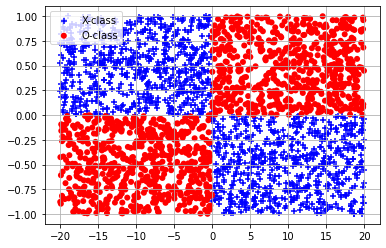

In [217]:
#set up number of samples
N = 1250 #number of samples

#set up upper and lower bound on your input probabilities
Uh= 20 # upper limit
Ul= -1

#set up O-class
O = np.random.uniform(0,Uh,size=(N,2))

for i in range(N):
  O[i][1] = ((O[i][1] * -(Ul)) / Uh)

for i in range(N):
  quadSelect = np.random.randint(0,2)
  if quadSelect:
    O[i][0] = -(O[i][0])
    O[i][1] = -(O[i][1])

#set up X-class
X = np.random.uniform(-Uh,0,size=(N,2))

for i in range(N):
  X[i][1] = -((X[i][1] * -(Ul)) / Uh)

for i in range(N):
  quadSelect = np.random.randint(0,2)
  if quadSelect:
    X[i][0] = -(X[i][0])
    X[i][1] = -(X[i][1])

plt.scatter(X[:,0],X[:,1],marker='+',c='blue', label='X-class')
plt.scatter(O[:,0],O[:,1],marker='o',c='red',edgecolors='none',label='O-class')
plt.legend()
plt.grid(True)

In [218]:
x_train = np.append(O,X,axis=0)

In [219]:
y_x = [[0] * 2 for i in range(N)]
y_o = [[0] * 2 for i in range(N)]

for i in range(N):
  y_x[i][0] = 1
  y_o[i][1] = 1

In [220]:
y_train = np.append(y_x,y_o,axis=0)

In [247]:
model = Sequential()

In [248]:
model.add(layers.Dense(8, activation="relu",input_shape=(2,)))

In [249]:
model.add(layers.Dense(2, activation="sigmoid"))

Model layer shapes:
(None, 2)
(None, 8)
(None, 8)
(None, 2)
Model initial weights:
[array([[ 0.37956345,  0.26443946,  0.70448434,  0.00738066, -0.63560474,
        -0.01121235,  0.01764083, -0.5756624 ],
       [ 0.67066586, -0.39172804,  0.72411466,  0.4046086 , -0.11304545,
         0.72566366, -0.7362656 , -0.7577908 ]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]
[array([[ 0.700315  , -0.42911854],
       [-0.01783699,  0.18587494],
       [-0.07085311,  0.21036899],
       [ 0.7212572 , -0.09681517],
       [-0.6223419 , -0.04446703],
       [ 0.34809148, -0.03901142],
       [-0.02205724,  0.00224864],
       [-0.39526683, -0.5472286 ]], dtype=float32), array([0., 0.], dtype=float32)]
Model sumamry
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 24        
_____________________________________

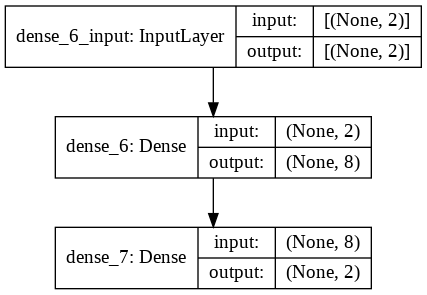

In [48]:
print("Model layer shapes:")
for layer in model.layers:
  print(layer.input_shape)
  print(layer.output_shape)

print("Model initial weights:")
for layer in model.layers:
  print(layer.get_weights())

print("Model sumamry")
model.summary()

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [250]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [251]:
model.fit(x_train,y_train,epochs=numEpoch,batch_size=batchSize,verbose=1,validation_split=valSplit)

Epoch 1/100
168/168 [==============================] - 1s 2ms/step - loss: 1.0815 - accuracy: 0.5387 - val_loss: 1.0591 - val_accuracy: 0.0654
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7704 - val_loss: 1.0751 - val_accuracy: 0.0351
Epoch 3/100
168/168 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7630 - val_loss: 1.0671 - val_accuracy: 0.0763
Epoch 4/100
168/168 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7606 - val_loss: 1.0557 - val_accuracy: 0.1259
Epoch 5/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7849 - val_loss: 0.9681 - val_accuracy: 0.1828
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7869 - val_loss: 0.9298 - val_accuracy: 0.2264
Epoch 7/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8143 - val_loss: 0.8587 - val_accuracy: 0.2821

In [252]:
x_test = np.random.uniform(-Uh,Uh,size=(testSize,2))

for i in range(testSize):
  x_test[i][1] = (((x_test[i][1] - (-Uh)) * (Ul*2)) / (Uh*2)) + -Ul

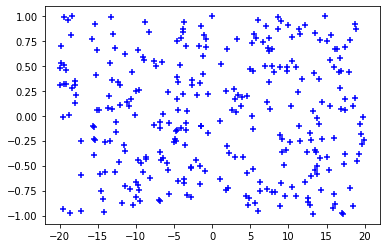

In [253]:
plt.scatter(x_test[:,0],x_test[:,1],marker='+',c='blue', label='X-class')

In [254]:
y_test = [[0] * 2 for i in range(testSize)]

for i in range(testSize):
  if (x_test[i][0] >= 0 and x_test[i][0] >= 0) or (x_test[i][0] <= 0 and x_test[i][1] <= 0):
    y_test[i][1] = 1
  else:
    y_test[i][0] = 1

In [255]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [256]:
model.evaluate(x_test,y_test,batch_size=batchSize)

30/30 [==============================] - 0s 1ms/step - loss: 8.2719 - accuracy: 0.2500


[8.271916389465332, 0.25]